In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('WindTurbineDesignHypervolumeMedianRun.csv')
dfmax = df.iloc[[-1]]


def plot_hypervolume(algs, offsets):
    f = plt.figure(figsize=(8, 6))
    ax = f.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    colors={
        "NSGAIII": "tab:orange",
        "SPEA2SDE": "tab:green",
        "SPEA2": "tab:red",
        "CMOMBI2": "tab:purple",
        "ThetaDEA": "tab:brown",
        "CMOEAD": "tab:pink",
        "NSGAII": "tab:grey",
        "HypE": "tab:olive",
        "CMOEADD": "tab:cyan",
        "CHHCO": "k",
        "CHHCORandom": "tab:blue"
    }

    labels={
        "NSGAIII": "NSGA-III",
        "SPEA2SDE": "SPEA2SDE",
        "SPEA2": "SPEA2",
        "CMOMBI2": "MOMBI2",
        "ThetaDEA": "ThetaDEA",
        "CMOEAD": "MOEA/D",
        "NSGAII": "NSGA-II",
        "HypE": "HypE",
        "CMOEADD": "MOEA/DD",
        "CHHCO": "HHCO",
        "CHHCORandom": "HHCO-rand"
    }

    for alg in algs:
        df.plot(x="FE", y=alg, ax=f.gca(), legend=False, color=colors[alg])
        plt.text(9870, dfmax[alg]+offset[alg], labels[alg], color=colors[alg], fontsize=12)
    plt.xlabel("Fitness Evaluations")
    plt.ylabel("Hypervolume")
    ax.grid(True, ls='--')
    ax.tick_params(axis='both', which='both', # labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
    plt.show()



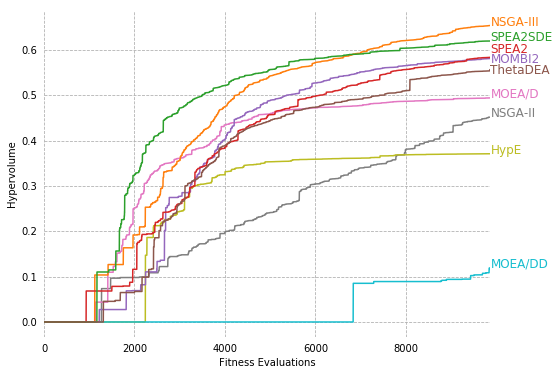

In [2]:
# MOEAs

offset={
    "NSGAIII": 0.0,
    "SPEA2SDE": 0.0,
    "SPEA2": 0.01,
    "CMOMBI2": -0.01,
    "ThetaDEA": -0.01,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
    "CMOEADD": 0.00,
}


plot_hypervolume(["NSGAII","HypE","CMOEADD","CMOEAD","NSGAIII","CMOMBI2","SPEA2","SPEA2SDE","ThetaDEA"], offset)

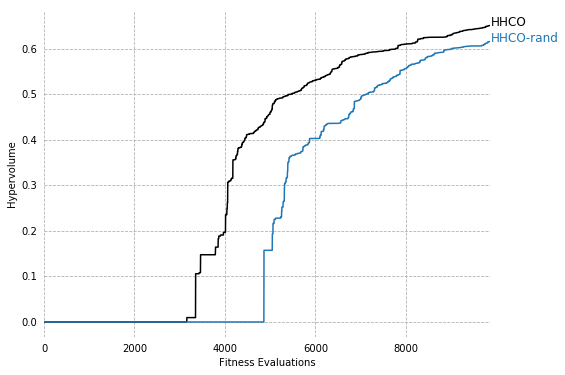

In [3]:
# HHs

offset={
    "CHHCO": 0.00,
    "CHHCORandom": 0.00
}

plot_hypervolume(["CHHCO", "CHHCORandom"], offset)

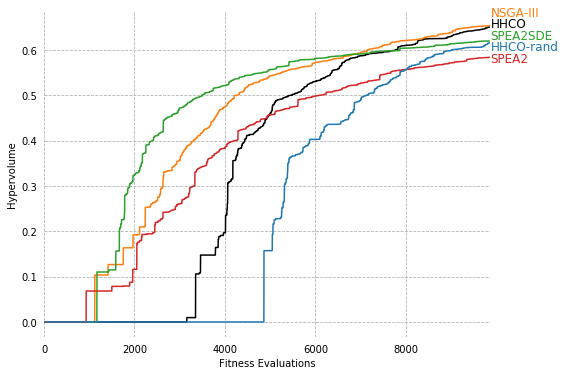

In [4]:
# best MOEAs and HHs

offset={
    "NSGAIII": 0.02,
    "SPEA2SDE": 0.005,
    "SPEA2": -0.01,
    "CMOMBI2": 0.0,
    "ThetaDEA": 0.0,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
    "CMOEADD": 0.00,
    "CHHCO": 0.00,
    "CHHCORandom": -0.015
}


plot_hypervolume(["CHHCO", "NSGAIII", "SPEA2SDE", "SPEA2", "CHHCORandom"], offset)

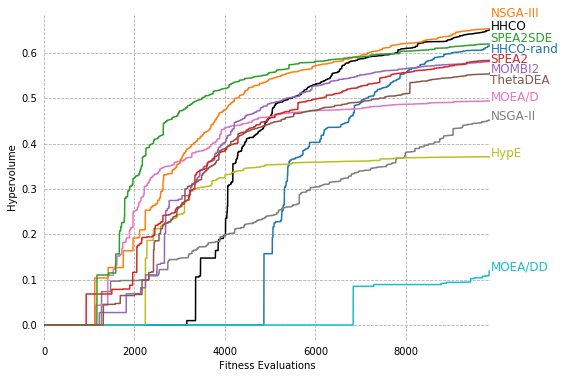

In [5]:
# all MOEAs and HHs

offset={
    "NSGAIII": 0.025,
    "SPEA2SDE": 0.005,
    "SPEA2": -0.005,
    "CMOMBI2": -0.025,
    "ThetaDEA": -0.025,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
    "CMOEADD": 0.00,
    "CHHCO": 0.00,
    "CHHCORandom": -0.015
}

algs=["CHHCO", "CHHCORandom", "NSGAII","HypE","CMOEADD","CMOEAD","NSGAIII","CMOMBI2","SPEA2","SPEA2SDE","ThetaDEA"]
plot_hypervolume(algs, offset)